# MÔ HÌNH HỒI QUY TUYẾN TÍNH

# Học máy có nhãn (Supervised learning)

Biến độc lập $X=(X_1,X_2,\dots,X_m)$ và biến phụ thuộc $Y$

**Mục tiêu:** Dự báo biến phụ thuộc khi biết biến độc lập $Y=f(X_1,X_2,\dots,X_m)$

**Phân loại (classification)**: Biến phụ thuộc là biến phân loại (categories)

**Hồi quy (Regression)**: Biến phụ thuộc là liên tục

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np

## 1. Boston housing data

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

In [2]:
boston = pd.read_csv('Boston.csv')

In [3]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
boston=boston.drop('Unnamed: 0',axis=1)

In [5]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Cơ sở hồi quy tuyến tính

## Hồi quy tuyến tính đơn giản ( 1 biến độc lập)

$$y=\beta_0+\beta_1 x$$


- $y$: biến phụ thuộc

- $x$: biến độc lập

- $\beta_0,\beta_1$: tham số của mô hình


## Hồi quy tuyến tính nhiều chiều (nhiều biến độc lập)

Hồi quy 2 biến: $y=\beta_0+\beta_1 x_2+\beta_2 x_2$

Hồi quy $m$ biến: $y=\beta_0+\beta_1x_1+\beta_2x_2+\dots+\beta_mx_m$

- $y$: biến phụ thuộc

- $x$: biến độc lập

- $\beta_0,\beta_1,\beta_2,\dots,\beta_m$: tham số của mô hình

### Xác định giá trị của tham số mô hình

- Xác định sai số ( hàm tổn thất) của mô hình.

- Chọn tham số để sai số nhỏ nhất.

## Mô hình lý thuyết

Giả sử rằng biến phụ thuộc $Y$ (output, dependent, response) có **quan hệ tuyến tính** 
với các biến đầu vào (independent, predictor) $X_1,X_2,\dots,X_m$ bởi công thức

$$ Y=\beta_0+\sum\limits_{j=1}^m \beta_j X_j+\varepsilon $$

trong đó $\varepsilon\sim N(0,\sigma^2)$ biến sai số không quan sát được (**error component**)

## Mục tiêu
Ước lượng các tham số $\beta_j$, phương sai $\sigma^2$, và sự ảnh hưởng các biến đầu vào đối với $Y$.

Giả sử ta có các $n$ quan sát $$(x_{i1},\dots,x_{im},y_i), i=1,2,\dots,n $$

$$y_i=\beta_0+\sum\limits_{j=1}^m \beta_j x_{ij}+e_i, i=1,2,\dots,n $$

với các $e_i$ là các sai số và cùng phân phối với $\varepsilon$

Ta sử dụng phương pháp **bình phương tối thiểu** ước lượng các $\beta_j$ sao cho sai số nhỏ nhất
$$SSE=\sum\limits_{i=1}^ne_i^2=\sum\limits_{i=1}^n (y_i-\beta_0-\sum\limits_{j=1}^m \beta_j x_{ij})^2 $$
$$\hat{\beta} =\arg\min SSE(\beta)$$

Tổng bình phương các sai số (SSE): $$SSE=\sum\limits_{i=1}^n \hat{e}_i^2=ESS(\hat{\beta}) $$
Hệ số $R^2$, $$ R^2=1-\dfrac{SSE}{SST}=1-\dfrac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{\sum\limits_{i=1}^n (y_i-\bar{y})^2}$$

## Thực hành với dữ liệu Boston

In [6]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
y = boston['medv'].values
x = boston.drop('medv',axis=1).values

### Dự báo giá nhà dựa vào một biến

Dự báo giá nhà `mdev` dựa vào biến `rm`, sử dụng mô hình hồi quy tuyến tính

In [8]:
X = boston['rm'].values
X = X.reshape(1, -1).T

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X, y)

In [10]:
y_pre = lr.predict(X)

Đánh giá mô hình: tính hệ số $R^2$

In [11]:
print('R_sq = ', lr.score(X, y))

R_sq =  0.4835254559913343


Trực quan mô hình 

In [12]:
resid = y - y_pre

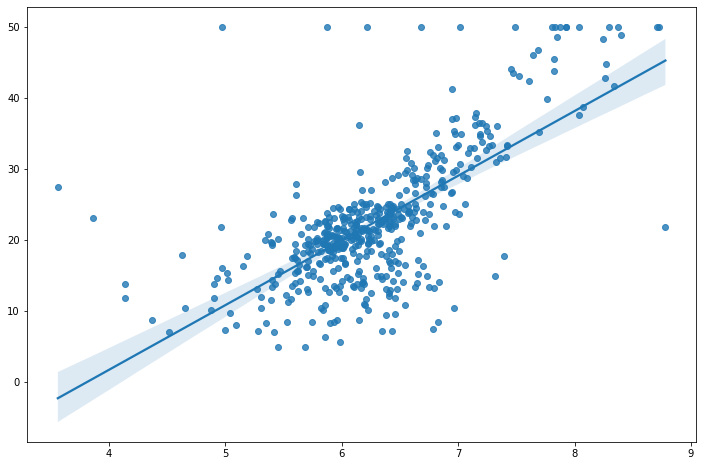

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))

ax = sns.regplot(X, y)

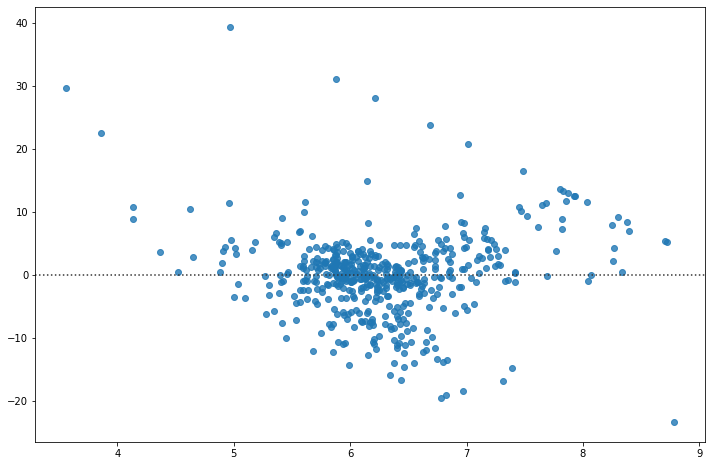

In [15]:
fig = plt.figure(figsize=(12, 8))
ax = sns.residplot(X, y)

## Dự báo giá nhà dựa vào tất cả các biến

In [ ]:
boston.head()

**Ta chia dữ liệu làm 2 phần: training( 70%) và testing (30%)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Tính hệ số $R^2$

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
print('R_sq = ', lr.score(X_train, y_train))
print('R_sq = ', lr.score(X_test, y_test))

## Kiểm tra độ chính xác của mô hình
- Thông thường ta chia dữ liệu thành hai tập: **tập huấn luyện** và **tập kiểm tra**. Khi xây dựng mô hình ta không được lấy tập kiểm tra để sử dụng. 
- Trong tập huấn luyện ta trích một phần dữ liệu huấn luyện gọi là tập **validation**. Mô hình được kiểm tra thông quan tập validation trên.
- Vấn đề chọn kích thước tập validation? 

## Phương pháp cross-validation
- Chia tập huấn luyện thành $k$ tập con (cùng kích thước), rời nhau.
- Mỗi lần kiểm tra thử, huấn luyện mô hình với $k-1$ tập và dùng tập còn lại là tập validation.
- Mô hình cuối cùng được lựa chọn dựa trên sai số huấn luyện và sai số của tập validation.

In [ ]:
from IPython.display import Image
Image('cross-validation.png')

** Nhược điểm**
- Phương pháp của phương pháp cross-validation là số lần thử nghiệm tỷ lệ với số tập chia nhỏ $K$.
- Người ta đưa ra phương pháp hiệu chỉnh (tránh huấn luyện quá khớp):
    - Dừng sớm
    - Thêm số hạng vào hàm mất mát

## Xây dựng mô hình sử dụng RANSAC

In [ ]:
from sklearn import linear_model

rs = linear_model.RANSACRegressor(random_state = 0).fit(X_train, y_train)

Đánh giá mô hình

In [ ]:
print('R_sq_train = ', rs.score(X_train, y_train))
print('R_sq_test = ', rs.score(X_test, y_test))


Trực quan mô hình

In [ ]:
# Robustly fit linear model with RANSAC algorithm
inlier_mask = rs.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X_train.min(), X_train.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (linear regression, RANSAC):")
print(lr.coef_, ransac.estimator_.coef_)

lw = 3
fig = plt.figure(figsize=(12, 8))

plt.scatter(X_train[inlier_mask], y_train[inlier_mask], color='yellowgreen', marker='.',label='Inliers')
plt.scatter(X_train[outlier_mask], y_train[outlier_mask], color='gold', marker='.', label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

# Hiệu chỉnh mô hình hồi quy (Regularized regression)

- Hồi quy tuyến tính cực tiểu hóa hàm tổn thất (loss function)

- Nếu chọn tất cả các biến độc lập

- Các biến độc lập lớn nên các hệ số lớn dẫn đến overfitting

- Hiệu chỉnh: Đưa thêm phần hiệu chỉnh các hệ số.

## Ridge Regression

- Hàm tổn thất $$L(\beta)=\sum\limits_{i=1}^n (y_i-\beta_0-\sum\limits_{j=1}^m \beta_j x_{ij})^2+\alpha\sum\limits_{j=0}^m \beta_j^2 $$

- $\alpha$: tham số (cần được xác định)

- Nếu $\alpha=0$: Ta có hồi quy thông thường

- Nếu $\alpha$ lớn: Có thể dẫn tới underfitting

Xây dựng mô hình với Ridge Regression

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)

Đánh giá mô hình

In [ ]:
reg.score(X_train, y_train)

Vẽ đồ thị thể hiện sự ảnh hưởng của tham số $\alpha$ đến độ chính xác của mô hình

In [ ]:
n_alphas = 20
alphas = np.logspace(-0.01, -2, n_alphas)
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results
fig = plt.figure(figsize=(12, 8))

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## Lasso regression

- Hàm tổn thất $$L(\beta)=\sum\limits_{i=1}^n (y_i-\beta_0-\sum\limits_{j=1}^m \beta_j x_{ij})^2+\alpha\sum\limits_{j=0}^m |\beta_j| $$

- $\alpha$: tham số (cần được xác định)


Xây dựng mô hình với Lasso Regression

In [ ]:
lasso = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)

Đánh giá mô hình

In [ ]:
print('Score: ', lasso.score(X_train, y_train))
print('Score test: ', lasso.score(X_test, y_test))

Vẽ đồ thị thể hiện sự ảnh hưởng của tham số $\alpha$ đến độ chính xác của mô hình

In [ ]:
n_alphas = 20
alphas = np.logspace(-0.01, -2, n_alphas)
coefs = []
for a in alphas:
    ridge = linear_model.Lasso(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results
fig = plt.figure(figsize=(12, 8))

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Dự đoán giá bất động sản

## 2. Bài toán dự đoán giá bất động sản Montreal

Dự báo giá nhà dựa trên các thông tin thông tin quan trọng về nhà. Dựa vào các mô hình hồi quy tuyến tính, hồi quy tuyến tính Ridge, hồi quy Laso, và hồi quy k lân cận gần nhất.

## Dữ liệu

In [ ]:
import pandas as pd
data=pd.read_csv("Montreal.csv")

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.info()

## Xử lý dữ liệu với các giá trị missing
- Loại bỏ các bản ghi có giá trị missing
- Khôi phục giá trị mising bằng giá trị trung bình

In [ ]:
features = list(data.columns)

In [ ]:
features[0] # Thuộc tính not_sold, 1 chưa bán, 0 đã bán

In [ ]:
features[1:14]# Các thuộc tính bán năm 2002-> 2014: 1 năm bán

In [ ]:
features[14:16]# Số giường, năm xây dựng

In [ ]:
features[16:18]# Tọa độ

In [ ]:
features[18:21]# Số phòng, số phòng tắm, diện tích

In [ ]:
features[21:26]# Tính chất bất động sản

In [ ]:
features[26:30]

In [ ]:
features[30:35]

In [ ]:
features[35:39]

In [ ]:
features[39] # Giá tài sản

Các biến phụ thuộc **39**, biến dự báo **1** 

### Dự báo giá nhà với dữ liệu data_removal (bỏ các bản ghi lỗi)
- Dữ liệu data_removal
- Chia dữ liệu thành dữ liệu huấn luyện (70%) và dữ liệu kiểm tra (30%)

In [ ]:
fig = plt.figure(figsize=(12, 8))
sns.heatmap(data_removal.corr())

### Note: 
- y gets high correlation with flex, house, living_area, num_bathroom, num_room, not_sold

Xây dựng mô hình dự đoán.

In [ ]:
def drop_binomial(X):
    X_new = pd.DataFrame()

    for _ in range(X.shape[1]):
        if X.iloc[: , _].unique().size != 2:
            X_new[X.columns[_]] = X[X.columns[_]]
    return X_new


In [ ]:
data_removal = data.dropna()
print(data_removal.shape) # no missing data

### Thử với các mẫu đã loại bỏ feature Binomial

In [ ]:
X = drop_binomial(data_removal) 
y = data_removal['askprice']
X

In [ ]:
fig = plt.figure(figsize=(12, 8))
sns.heatmap(X.corr())

In [ ]:
X.drop('askprice', inplace=True, axis=1) # drop askprice

### Baseline model:



In [ ]:
lr = linear_model.LinearRegression().fit(X_train, y_train)
print("LR Score: ", lr.score(X_train, y_train))
print("LR Score Test: ", lr.score(X_test, y_test))

rs = linear_model.RANSACRegressor(random_state = 0).fit(X_train, y_train)
print("RANSAC Score: ", rs.score(X_train, y_train))
print("RANSAC Score Test: ", rs.score(X_test, y_test))

Rig = linear_model.Ridge(alpha=.5).fit(X_train, y_train)
print("Rig Score: ", Rig.score(X_train, y_train))
print("Rig Score Test: ", Rig.score(X_test, y_test))

lasso = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)
print("Lasso Score: ", lasso.score(X_train, y_train))
print("Lasso Score Test: ", lasso.score(X_test, y_test))

### simple regression with ['living_area']

In [ ]:
lr = linear_model.LinearRegression().fit(X_train['living_area'].values.reshape(1, -1).T, y_train)
print("LR Score: ", lr.score(X_train['living_area'].values.reshape(1, -1).T, y_train))
print("LR Score Test: ", lr.score(X_test['living_area'].values.reshape(1, -1).T, y_test))

rs = linear_model.RANSACRegressor(random_state = 0).fit(X_train['living_area'].values.reshape(1, -1).T, y_train)
print("RANSAC Score: ", rs.score(X_train['living_area'].values.reshape(1, -1).T, y_train))
print("RANSAC Score Test: ", rs.score(X_test['living_area'].values.reshape(1, -1).T, y_test))

Rig = linear_model.Ridge(alpha=.5).fit(X_train['living_area'].values.reshape(1, -1).T, y_train)
print("Rig Score: ", Rig.score(X_train['living_area'].values.reshape(1, -1).T, y_train))
print("Rig Score Test: ", Rig.score(X_test['living_area'].values.reshape(1, -1).T, y_test))

lasso = linear_model.Lasso(alpha=0.1).fit(X_train['living_area'].values.reshape(1, -1).T, y_train)
print("Lasso Score: ", lasso.score(X_train['living_area'].values.reshape(1, -1).T, y_train))
print("Lasso Score Test: ", lasso.score(X_test['living_area'].values.reshape(1, -1).T, y_test))

### Note: Vì các mô hình đều cho score sấp xỉ nhau và khá thấp . Nên ta chọn Model có score lớn nhất -> Linear Reg

### Thử mô hình với tất cả các independent feature:


In [ ]:
from sklearn.linear_model import Ridge, Lasso

X = data.iloc[:, :39]
y = data['askprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)


ridge = Ridge(alpha=0.1, normalize=True).fit(X_train, y_train)
ypre_train = ridge.predict(X_train)
ypre_test = ridge.predict(X_test)


### Đánh giá mô hình

In [ ]:
from sklearn.metrics import r2_score

print("r2 test: ", r2_score(y_test, ypre_test))
print("r2 train: ", r2_score(y_train, ypre_train))


> note: Mô hình cho dữ liệu khá tốt. nên ta chọn Model này để dự đoán. 

## Trực quan mô hình với simple linear regression:


In [ ]:
fig = plt.figure(figsize=(12,8))

sns.regplot(X_train.living_area.values.reshape(1, -1).T, y_train)

In [ ]:
fig = plt.figure(figsize=(12,8))

sns.regplot(X_train.num_bath.values.reshape(1, -1).T, y_train)


In [ ]:
fig = plt.figure(figsize=(12,8))

sns.regplot(X_train.num_room.values.reshape(1, -1).T, y_train)

## Trực quan mô hình với Multiple feature linear regression:

In [ ]:
from yellowbrick.regressor import ResidualsPlot
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Processing : 


In [ ]:
sns.boxplot(X_train.num_room.values.reshape(1, -1).T)

In [ ]:
sns.boxplot(X_train.living_area.values.reshape(1, -1).T)

### note: Còn nhiều nhiễu cần được xử lý. 


In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)